In [108]:
import numpy as np
import pandas as pd
#%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("LS_2.0.csv")

In [12]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOT_ELECTORS,OVER_TOT_VOTES,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [5]:
df.shape

(2263, 19)

df.columns = ['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL_CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL_VOTES', 'POSTAL_VOTES', 'TOTAL_VOTES',
       'OVER_TOT_ELECTORS',
       'OVER_TOT_VOTES', 'TOTAL_ELECTORS']

In [13]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATE,2263,36,Uttar Pradesh,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONSTITUENCY,2263,539,AURANGABAD,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME,2263,2014,NOTA,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WINNER,2263,NaN,NaN,NaN,0.238179,0.426064,0,0,0,0,1
PARTY,2263,133,BJP,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SYMBOL,2018,126,Lotus,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,2018,2,MALE,1760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIMINAL_CASES,2018,29,0,1242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,2018,NaN,NaN,NaN,52.2735,11.8694,25,43.25,52,61,86
CATEGORY,2018,3,GENERAL,1392,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
def party_convert(party):
    lst = list(df.PARTY.value_counts()[0:30].index)
    if party in lst:
        return party
    else:
        return "OTH"

In [80]:
df["PARTY_PLOT"] = df["PARTY"].apply(party_convert)

In [94]:
windf = df[df["WINNER"]==1]

In [100]:
df["CONSTITUENCY"].unique().size

539

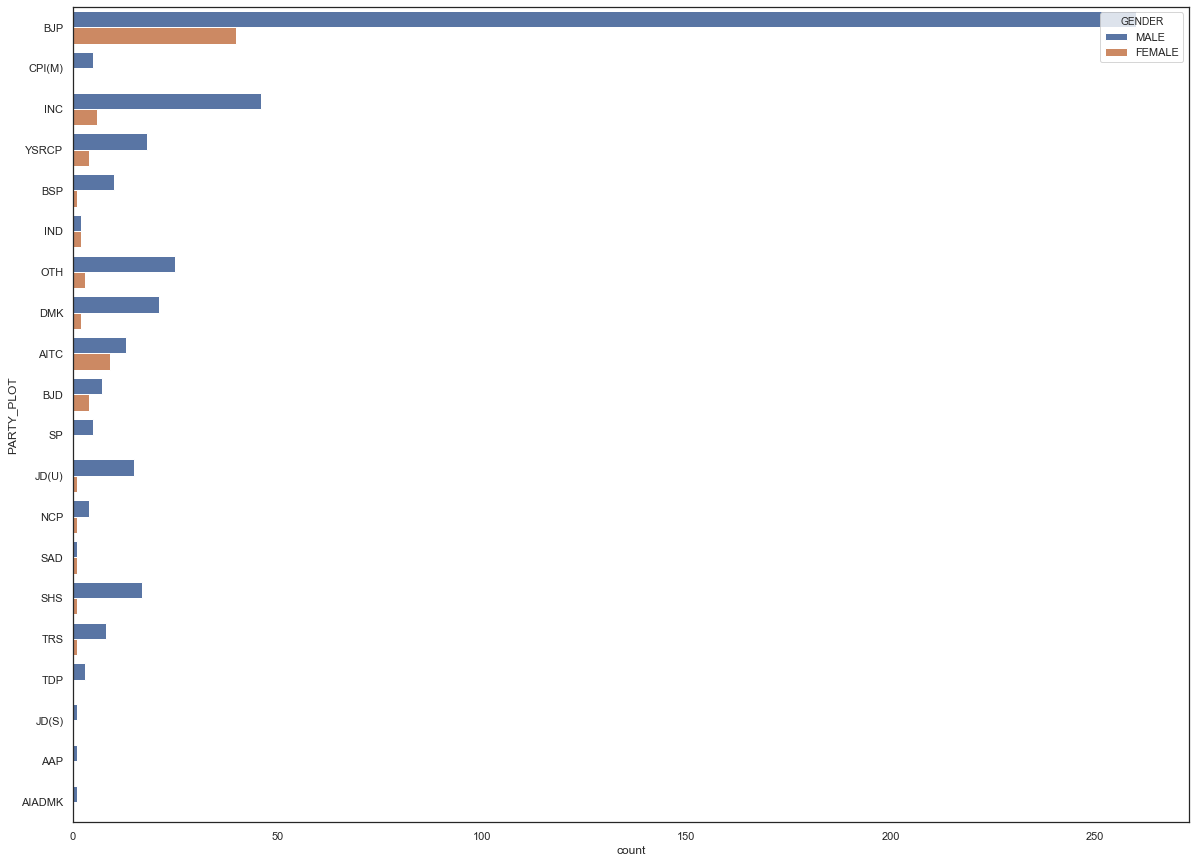

In [132]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
ax.set_xticklabels(ax.get_xticklabels(),fontsize=4)

ax= sns.countplot(y="PARTY_PLOT",data=windf,hue="GENDER")
plt.show()

In [139]:
windf["PARTY"].value_counts()

In [155]:
df["GENDER"].value_counts()

MALE      1760
FEMALE     258
Name: GENDER, dtype: int64

In [154]:
windf["GENDER"].value_counts()

MALE      463
FEMALE     76
Name: GENDER, dtype: int64

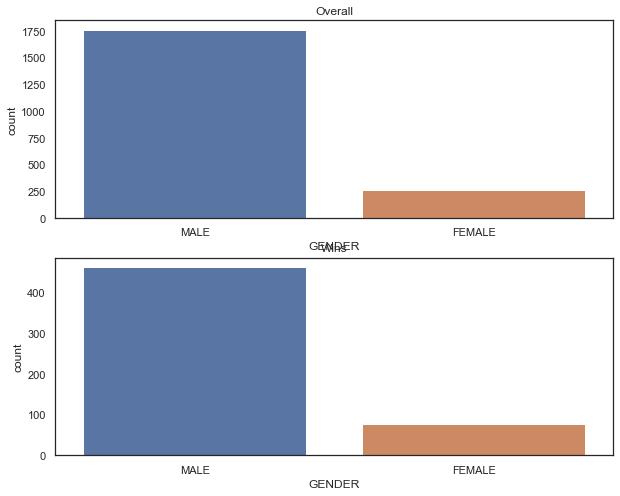

In [153]:
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(2,1,1)
ax1.set_title("Overall")
ax1 = sns.countplot(x = "GENDER", data=df)

ax2 = plt.subplot(2,1,2)
ax2.set_title("Wins")
ax2 = sns.countplot(x = "GENDER", data=windf)